<a href="https://colab.research.google.com/github/arpithaupd/HelloWord/blob/master/Intubation_Prediction_using_CNN_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Clone Dataset

In [2]:
! git clone https://github.com/arpithaupd/CXRDataset.git

#! git clone https://github.com/education454/datasets.git

Cloning into 'CXRDataset'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 153 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (153/153), 55.75 MiB | 12.66 MiB/s, done.


In [3]:
import os 
main_dir = '/content/CXRDataset' #'/content/datasets/Data'
train_dir =os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
train_covid_dir = os.path.join(train_dir,'intubated')
train_normal_dir = os.path.join(train_dir,'nointubated')
test_covid_dir = os.path.join(test_dir,'intubated')
test_normal_dir = os.path.join(test_dir,'nointubated')


In [4]:
print(train_dir,train_covid_dir)

/content/CXRDataset/train /content/CXRDataset/train/intubated


In [5]:
print(test_covid_dir,test_normal_dir)

/content/CXRDataset/test/intubated /content/CXRDataset/test/nointubated


In [6]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['16669_1_1.jpeg', 'paving.jpg', 'covid-19-pneumonia-23-day3.jpg', 'figure1-5e7c1b8d98c29ab001275405-98.jpeg', 'covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-3.jpg', 'AR-1.jpg', '16660_1_1.jpg', '16660_2_1.jpg', 'AR-2.jpg', 'lancet-case2b.jpg']
['F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg', '16745_4_1.png', '000001-9-a.jpg', '000008-8.jpg', '000001-19.jpg', '000001.jpg', '000002-11-a.jpg', '1-s2.0-S0929664620300449-gr2_lrg-d.jpg', '16745_6_1.png', '16745_5_1.png']
['1-s2.0-S0085253820303616-gr1_lrg-b.png', 'extubation-4.jpg', '10.1016-slash-j.anl.2020.04.002-c.png', '10.1016-slash-j.cardfail.2020.04.007-b.png', '16673_2_1.jpg', '10.1016-slash-j.cardfail.2020.04.007-a.png', '16724_1_1.jpg', '10.1016-slash-j.anl.2020.04.002-b.png', '16744_1_1.jpg', 'extubation-8.jpg']
['tpmd200203f2-c.png', 'covid-19-caso-95-3-14.png', 'covid-19-caso-91-1-12.png', '1-s2.0-S1059131120301151-gr2-e.png', '1-s2.0-S2214250920300834-gr1_lrg-c.png', 'article_river_e4d185c06e3511eaa232

In [7]:
print("train dataset intubated images :",len(train_covid_names))
print("train dataset no-intubated images :",len(train_normal_names))
print("test dataset intubated images :",len(test_covid_names))
print("test dataset no-intubated images :",len(test_normal_names))
print("Total train images :",len(train_covid_names+train_normal_names))
print("Total test images :",len(test_covid_names+test_normal_names))


train dataset intubated images : 44
train dataset no-intubated images : 44
test dataset intubated images : 24
test dataset no-intubated images : 26
Total train images : 88
Total test images : 50


# Data Visualization

['/content/CXRDataset/train/intubated/16669_1_1.jpeg', '/content/CXRDataset/train/intubated/paving.jpg', '/content/CXRDataset/train/intubated/covid-19-pneumonia-23-day3.jpg', '/content/CXRDataset/train/intubated/figure1-5e7c1b8d98c29ab001275405-98.jpeg', '/content/CXRDataset/train/intubated/covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-3.jpg', '/content/CXRDataset/train/intubated/AR-1.jpg', '/content/CXRDataset/train/intubated/16660_1_1.jpg', '/content/CXRDataset/train/intubated/16660_2_1.jpg']
['/content/CXRDataset/train/nointubated/F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg', '/content/CXRDataset/train/nointubated/16745_4_1.png', '/content/CXRDataset/train/nointubated/000001-9-a.jpg', '/content/CXRDataset/train/nointubated/000008-8.jpg', '/content/CXRDataset/train/nointubated/000001-19.jpg', '/content/CXRDataset/train/nointubated/000001.jpg', '/content/CXRDataset/train/nointubated/000002-11-a.jpg', '/content/CXRDataset/train/nointubated/1-s2.0-S092966462030

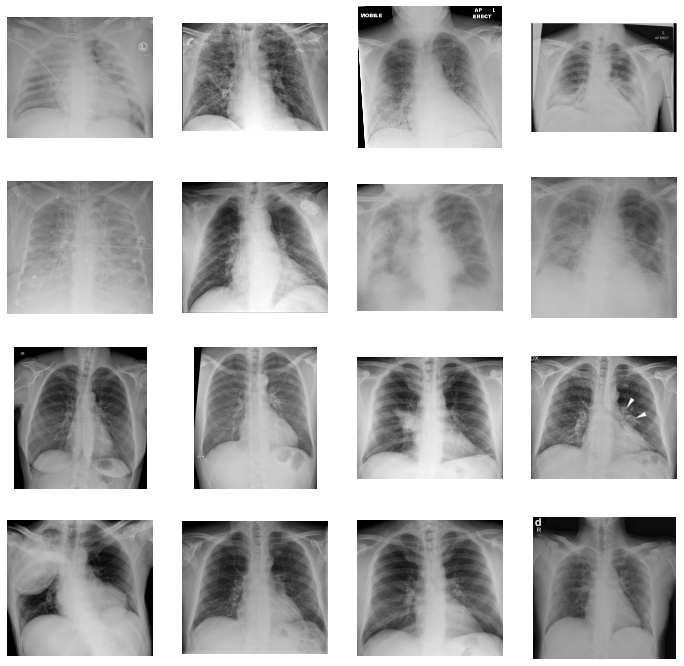

In [8]:
#lets plot a grid of 16 images (8 images of Covid19 and 8 images of Normal) 


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#set the number of columns and rows
nrows = 4
ncols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]

#print the list
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  #data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  #sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
  
plt.show()

**Data Visualization seperately labels added:**

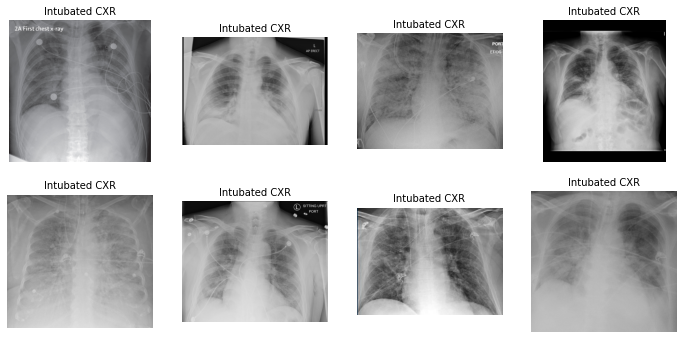

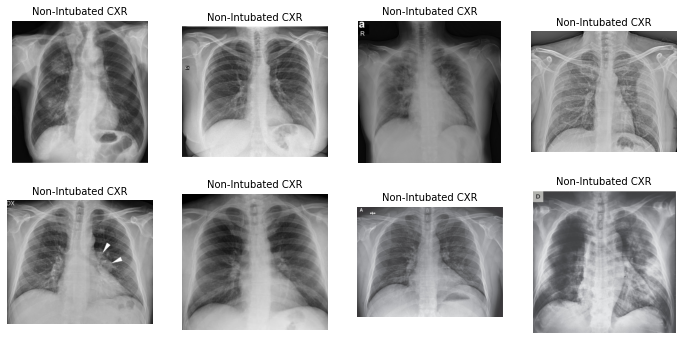

In [47]:
#set the number of columns and rows
nrows = 4
ncols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

for i , img_path in enumerate(next_covid_pic): #+next_normal_pic
  #data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title("Intubated CXR",fontsize=10)
  plt.imshow(img,cmap='gray')
  
plt.show()

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

for i , img_path in enumerate(next_normal_pic): #+next_normal_pic
  #data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title("Non-Intubated CXR",fontsize=10)
  plt.imshow(img,cmap='gray')
  
plt.show()

# Generating Training , Validation & Testing Batches

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)                               

# Generator for our validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (224,224),
                                                    subset = 'training',
                                                    batch_size = 4, #arpitha changed 32 to 10
                                                    class_mode = 'binary') #arpitha changed 150 to 224

validation_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (224,224),
                                                    subset = 'validation',
                                                    batch_size = 4, #arpitha changed 32 to 10
                                                    class_mode = 'binary') #arpitha changed 150 to 224

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (224,224),
                                                    batch_size = 4, #arpitha changed 32 to 10
                                                    class_mode = 'binary') #arpitha changed 150 to 224

Found 72 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'intubated': 0, 'nointubated': 1}

In [11]:
print("train_generator:",len(train_generator))
print("validation_generator:",len(validation_generator))
print("test_generator:",len(test_generator))

train_generator: 18
validation_generator: 4
test_generator: 13


In [12]:
train_generator.image_shape

(224, 224, 3)

# Build CNN Model

In [13]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

from keras import models
from keras import layers

from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda



# **CNN Model# 1 : Custom model : 51 Train, 51 test**

In [14]:
#custom CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(224,224,3))) #arpitha changed 150 to 224
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

# **Compile & Train Model**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
18/18 [==============================] - 18s 315ms/step - loss: 1.8324 - accuracy: 0.3889 - val_loss: 0.6520 - val_accuracy: 0.7500
Epoch 2/10
18/18 [==============================] - 4s 225ms/step - loss: 1.0672 - accuracy: 0.5139
Epoch 3/10
18/18 [==============================] - 4s 218ms/step - loss: 0.8355 - accuracy: 0.4861
Epoch 4/10
18/18 [==============================] - 4s 223ms/step - loss: 0.7047 - accuracy: 0.5833
Epoch 5/10
18/18 [==============================] - 4s 221ms/step - loss: 0.6882 - accuracy: 0.5833
Epoch 6/10
18/18 [==============================] - 4s 217ms/step - loss: 0.6799 - accuracy: 0.5694
Epoch 7/10
18/18 [==============================] - 4s 200ms/step - loss: 0.6677 - accuracy: 0.5972
Epoch 8/10
18/18 [==============================] - 4s 216ms/step - loss: 0.7023 - accuracy: 0.5694
Epoch 9/10
18/18 [==============================] - 4s 219ms/step - loss: 0.6882 - accuracy: 0.4722
Epoch 10/10
18/18 [==============================] - 4s 2

Text(0.5, 0, 'epoch')

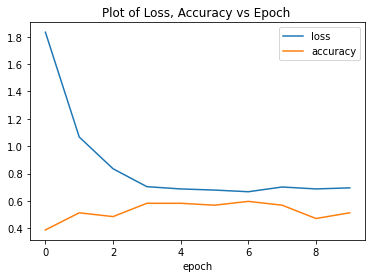

In [15]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])

#train the model
history = model.fit(train_generator,
                              epochs=10,
                              validation_data = validation_generator,
                              validation_steps = 10)

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.title('Plot of Loss, Accuracy vs Epoch ')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

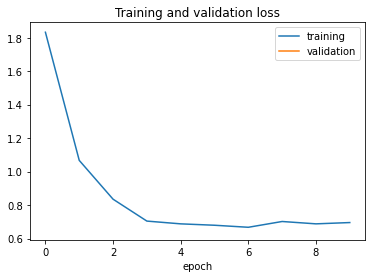

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')



Text(0.5, 0, 'epoch')

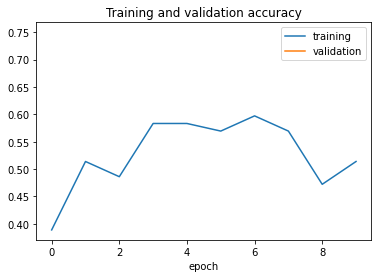

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')



In [18]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

13/13 [==============================] - 1s 95ms/step - loss: 0.6925 - accuracy: 0.5200
test acc :0.5199999809265137 test loss:0.69251549243927


# **TL - CNN Model# 1 : DenseNet169 : train 97.2 , test 72**

In [19]:
model = Sequential()

In [20]:
conv_base = tf.keras.applications.DenseNet169(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3)) #arpitha changed 150 to 224

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

#https://github.com/EXJUSTICE/COVID19_Detection_Transfer_Learning_VGG16/blob/master/Covid19_GradientCrescent_Binary.ipynb

51888128/51877672 [==============================] - 3s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten_1 (Flatten)         (None, 81536)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               20873472  
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 33,516,609
Trainable params: 20,873,729
Non-trainable params: 12,642,880
_________________________________________________________________


# Compile & Train Model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
18/18 [==============================] - 20s 460ms/step - loss: 2.5949 - accuracy: 0.6528 - val_loss: 1.1340 - val_accuracy: 0.4375
Epoch 2/10
18/18 [==============================] - 4s 225ms/step - loss: 0.4461 - accuracy: 0.7778
Epoch 3/10
18/18 [==============================] - 4s 214ms/step - loss: 0.3363 - accuracy: 0.8472
Epoch 4/10
18/18 [==============================] - 4s 218ms/step - loss: 0.3683 - accuracy: 0.8750
Epoch 5/10
18/18 [==============================] - 4s 224ms/step - loss: 0.2018 - accuracy: 0.9167
Epoch 6/10
18/18 [==============================] - 4s 227ms/step - loss: 0.1310 - accuracy: 0.9722
Epoch 7/10
18/18 [==============================] - 4s 227ms/step - loss: 0.0975 - accuracy: 0.9583
Epoch 8/10
18/18 [==============================] - 4s 226ms/step - loss: 0.0656 - accuracy: 0.9861
Epoch 9/10
18/18 [==============================] - 4s 221ms/step - loss: 0.0995 - accuracy: 0.9722
Epoch 10/10
18/18 [==============================] - 4s 2

Text(0.5, 0, 'epoch')

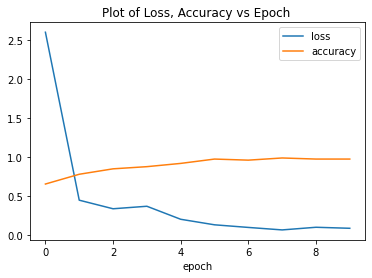

In [21]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])

#train the model
history = model.fit(train_generator,
                              epochs=10,
                              validation_data = validation_generator,
                              validation_steps = 10)

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.title('Plot of Loss, Accuracy vs Epoch ')
plt.xlabel('epoch')




Text(0.5, 0, 'epoch')

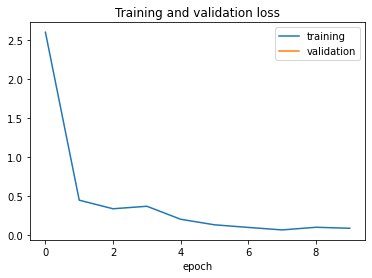

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')



Text(0.5, 0, 'epoch')

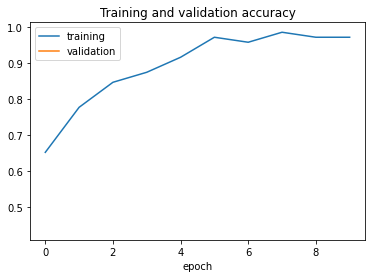

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')



In [24]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

13/13 [==============================] - 3s 237ms/step - loss: 0.8291 - accuracy: 0.7200
test acc :0.7200000286102295 test loss:0.8290947079658508


#  TL - CNN Model# 2 : VGG16 : Train 91 , Test 75.9

In [25]:
model = Sequential()
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3)) #arpitha changed 150 to 224

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

#https://github.com/EXJUSTICE/COVID19_Detection_Transfer_Learning_VGG16/blob/master/Covid19_GradientCrescent_Binary.ipynb

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


# **Compile & Train Model**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
18/18 [==============================] - 8s 303ms/step - loss: 0.8101 - accuracy: 0.5139 - val_loss: 0.5960 - val_accuracy: 0.5625
Epoch 2/10
18/18 [==============================] - 4s 228ms/step - loss: 0.7105 - accuracy: 0.5694
Epoch 3/10
18/18 [==============================] - 4s 218ms/step - loss: 0.5126 - accuracy: 0.7639
Epoch 4/10
18/18 [==============================] - 4s 230ms/step - loss: 0.3851 - accuracy: 0.8333
Epoch 5/10
18/18 [==============================] - 4s 222ms/step - loss: 0.3479 - accuracy: 0.8472
Epoch 6/10
18/18 [==============================] - 4s 232ms/step - loss: 0.3475 - accuracy: 0.8194
Epoch 7/10
18/18 [==============================] - 4s 225ms/step - loss: 0.4015 - accuracy: 0.7917
Epoch 8/10
18/18 [==============================] - 4s 228ms/step - loss: 0.3151 - accuracy: 0.8611
Epoch 9/10
18/18 [==============================] - 4s 231ms/step - loss: 0.2492 - accuracy: 0.9444
Epoch 10/10
18/18 [==============================] - 4s 22

Text(0.5, 0, 'epoch')

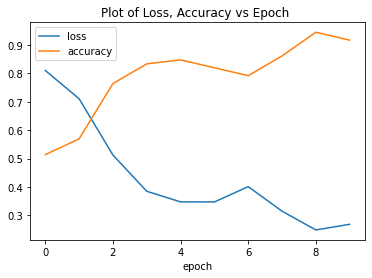

In [26]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])

#train the model
history = model.fit(train_generator,
                              epochs=10,
                              validation_data = validation_generator,
                              validation_steps = 10)

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.title('Plot of Loss, Accuracy vs Epoch ')
plt.xlabel('epoch')



Text(0.5, 0, 'epoch')

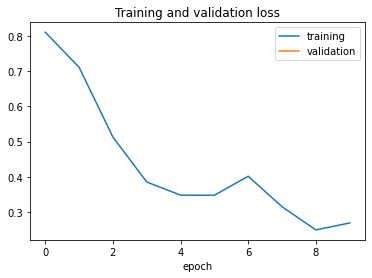

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')



Text(0.5, 0, 'epoch')

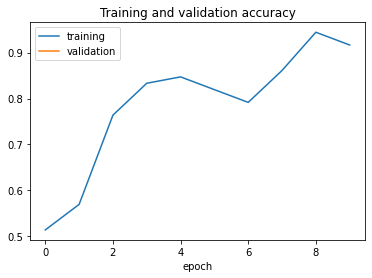

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')



In [29]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

13/13 [==============================] - 3s 236ms/step - loss: 0.5537 - accuracy: 0.7600
test acc :0.7599999904632568 test loss:0.5536805987358093


# **TL - CNN Model# 3 : Xception : Train 93, test 63.9**

In [30]:
from keras.applications import xception

conv_base = xception.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()

conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

#https://github.com/EXJUSTICE/COVID19_Detection_Transfer_Learning_VGG16/blob/master/Covid19_GradientCrescent_Binary.ipynb

83697664/83683744 [==============================] - 1s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               25690368  
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 46,552,105
Trainable params: 25,690,625
Non-trainable params: 20,861,480
_________________________________________________________________


# **Compile & Train Model**

In [31]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
#train the model
history = model.fit(train_generator,
                              epochs=10,
                              validation_data = validation_generator,
                              validation_steps = 10)

#20 10 : 56 with LR 0.001
#20 10 : 61 with LR 0.0001
#20 5  : 56 with LR 0.0001
#20 5  : 81 with LR 0.0001 with VGG
#20 5  : 98 with LR 0.0001 with tf.keras.applications.DenseNet169
#10 10 : 90 with LR 0.0001 with tf.keras.applications.DenseNet169
#10 10 : 84 with LR 0.0001 with tf.keras.applications.DenseNet169 image sized 224 from 150
#10 10 : 93 with LR 0.0001 with tf.keras.applications.DenseNet169 image sized 224 from 150
#custom CNN model : 65 with batch of 4 while generating data from 5
#VGG + CustomCNN1 : 94 with batch of 4 while generating data from 5
#Densenet169 + CustomCNN2 : 97 with batch of 4 while generating data from 5
#Xception + CustomCNN3 : 97.22 with batch of 4 while generating data from 5

Epoch 1/10
18/18 [==============================] - 10s 368ms/step - loss: 1.3819 - accuracy: 0.5278 - val_loss: 0.6848 - val_accuracy: 0.6250
Epoch 2/10
18/18 [==============================] - 4s 212ms/step - loss: 0.6763 - accuracy: 0.6389
Epoch 3/10
18/18 [==============================] - 4s 214ms/step - loss: 0.4107 - accuracy: 0.8194
Epoch 4/10
18/18 [==============================] - 4s 207ms/step - loss: 0.2681 - accuracy: 0.9028
Epoch 5/10
18/18 [==============================] - 4s 216ms/step - loss: 0.2527 - accuracy: 0.8750
Epoch 6/10
18/18 [==============================] - 4s 210ms/step - loss: 0.1985 - accuracy: 0.9444
Epoch 7/10
18/18 [==============================] - 4s 214ms/step - loss: 0.2146 - accuracy: 0.9306
Epoch 8/10
18/18 [==============================] - 4s 222ms/step - loss: 0.1359 - accuracy: 0.9306
Epoch 9/10
18/18 [==============================] - 4s 222ms/step - loss: 0.1174 - accuracy: 0.9444
Epoch 10/10
18/18 [==============================] - 4s 2

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

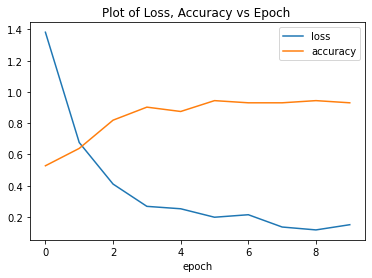

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.title('Plot of Loss, Accuracy vs Epoch ')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

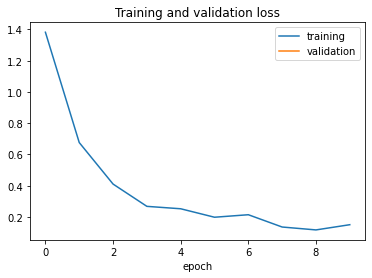

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

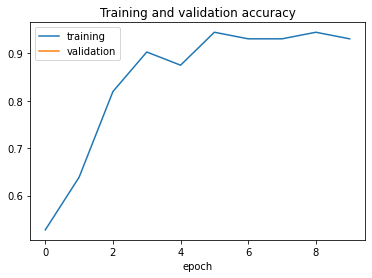

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [37]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

#20 5  : 76 with LR 0.0001 with tf.keras.applications.DenseNet169
#10 10 : 45 with LR 0.0001 with tf.keras.applications.DenseNet169
#10 10 : 77 with LR 0.0001 with tf.keras.applications.DenseNet169 image sized 224 from 150
#custom CNN model : test acc :0.51 test loss:0.69 with batch of 4 while generating data from 5
#VGG + CustomCNN1 : test acc :0.72 test loss:0.62 with batch of 4 while generating data from 5
#Densenet169 + CustomCNN2 : 0.75 test loss:1.48 with batch of 4 while generating data from 5
#Xception + CustomCNN3 : 0.759 test loss:0.84 with batch of 4 while generating data from 5

13/13 [==============================] - 2s 159ms/step - loss: 0.5457 - accuracy: 0.7000
test acc :0.699999988079071 test loss:0.5456895232200623


**Test your model here**

In [ ]:
#test your model with some images from your local computer to predict whether a patient is affected by COVID19 or not.
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(224,224)) #arpitha changed 150 to 224
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  print(classes)
  myval = classes * 1000000
  print(myval)
  if myval>=1: #classes==0
    print('Covid19 intubated')
  else:
    print('Normal nointubated')

In [ ]:
 print(myval)

In [ ]:
if classes==0:
  print('Covid19')
else:
  print('Normal')

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5') 